In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
import matplotlib.patches as mpatches
import os
os.chdir("C:/Users/melkrewi/Desktop/shrimp/snRNAseq/z_inactivation_asexuals/")

In [2]:
kaz_gtf=pd.read_csv("merged_kaz_adult_2.gtf",sep="\t",header=None)
kaz_gtf_2=kaz_gtf[[0,2,3,8]]
kaz_gtf_2=kaz_gtf_2[kaz_gtf_2[2]=='transcript']
kaz_gtf_2['gene_id']=kaz_gtf_2[8].str.split(';',expand=True)[0]
kaz_gtf_2=kaz_gtf_2[[0,2,3,'gene_id']].drop_duplicates(subset='gene_id', keep="first")
kaz_gtf_2['gene_id']=kaz_gtf_2['gene_id'].str[9:-1]

In [3]:
#seurat_clusters=pd.read_csv("merged_fran_adult_2.gtf",sep="\t",header=None)
normalized_exp=pd.read_csv("normalized_expression_kaz.csv",sep=",",low_memory=False)
#normalized_exp=pd.read_csv("normalized_expression_combined.csv",sep=",",low_memory=False)

In [4]:
merged_normalized=pd.merge(normalized_exp,kaz_gtf_2,left_on='gene',right_on='gene_id')

In [5]:
merged_all_norm=merged_normalized[merged_normalized[0].str.contains('Chromosome_')]

In [6]:
seurat_clusters=pd.read_csv("seurat_clusters_cells.txt",sep=",")
#seurat_clusters=pd.read_csv("seurat_clusters_combined_Cells.txt",sep=",")

In [12]:
merged_all_norm.loc[
  merged_all_norm[0]!='Chromosome_1_RagTag', 
  'strata'
] = 'Autosomal'
merged_all_norm.loc[
  ((merged_all_norm[0]=='Chromosome_1_RagTag')&(merged_all_norm[3]<=2*10**7)), 
  'strata'
] = 'pseudo'
merged_all_norm.loc[
  ((merged_all_norm[0]=='Chromosome_1_RagTag')&(merged_all_norm[3]>2*10**7)&(merged_all_norm[3]<=4*10**7)), 
  'strata'
] = 'S1'
merged_all_norm.loc[
  ((merged_all_norm[0]=='Chromosome_1_RagTag')&(merged_all_norm[3]>4*10**7)), 
  'strata'
] = 'S0'
#merged_all_norm.loc[
#  ((merged_all_norm[0]=='Chromosome_1_RagTag')&(merged_all_norm[3]>4*10**7)), 
#  'strata'
#] = 'undefined'

C:\Users\melkrewi\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [13]:
merged_all_norm_s2=merged_all_norm.drop([0,2,3,'gene','gene_id'],axis=1).groupby(["strata"]).mean().T.reset_index()

In [14]:
merged_all_norm_s3=pd.merge(seurat_clusters,merged_all_norm_s2,left_on='barcodes',right_on='index')
merged_all_norm_s3['S0/Auto']=np.log2((merged_all_norm_s3['S0']+0.001)/(merged_all_norm_s3['Autosomal']+0.001))
merged_all_norm_s3['S1/Auto']=np.log2((merged_all_norm_s3['S1']+0.001)/(merged_all_norm_s3['Autosomal']+0.001))
merged_all_norm_s3['pseudo/Auto']=np.log2((merged_all_norm_s3['pseudo']+0.001)/(merged_all_norm_s3['Autosomal']+0.001))

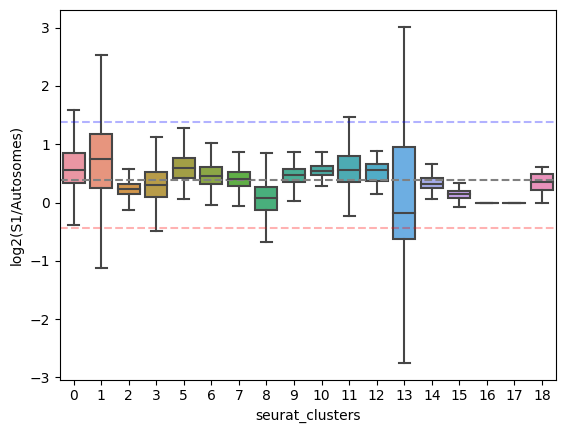

In [19]:
sns.boxplot(x='seurat_clusters', y='S1/Auto', data=merged_all_norm_s3,showfliers=False)
plt.hlines(np.median(merged_all_norm_s3['S1/Auto']),-0.5,17.5,color="gray",linestyle='dashed')
plt.hlines(np.percentile(merged_all_norm_s3['S1/Auto'],5),-0.5,17.5,color="red",linestyle='dashed',alpha=0.3)
plt.hlines(np.percentile(merged_all_norm_s3['S1/Auto'],95),-0.5,17.5,color="blue",linestyle='dashed',alpha=0.3)
plt.ylabel('log2(S1/Autosomes)',fontsize=10)
#plt.fill_between([-0.5,17.5], np.percentile(merged_all_norm_3['S0/Auto'],5),np.percentile(merged_all_norm_3['S0/Auto'],95), facecolor='lightblue', alpha=0.7)
#plt.savefig('./paper_figures/S1_vs_Auto_mean.png',bbox_inches='tight')
plt.savefig('C:/Users/melkrewi/Desktop/shrimp/snRNAseq/LAB_meeting_19_03_2023/S1_vs_Auto_mean_kaz.png',bbox_inches='tight')

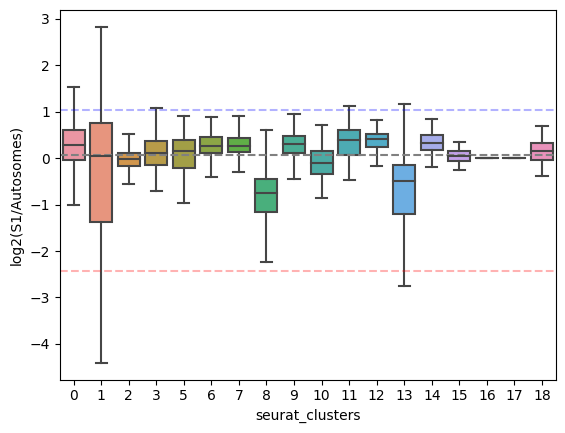

In [20]:
sns.boxplot(x='seurat_clusters', y='S0/Auto', data=merged_all_norm_s3,showfliers=False)
plt.hlines(np.median(merged_all_norm_s3['S0/Auto']),-0.5,17.5,color="gray",linestyle='dashed')
plt.hlines(np.percentile(merged_all_norm_s3['S0/Auto'],5),-0.5,17.5,color="red",linestyle='dashed',alpha=0.3)
plt.hlines(np.percentile(merged_all_norm_s3['S0/Auto'],95),-0.5,17.5,color="blue",linestyle='dashed',alpha=0.3)
plt.ylabel('log2(S1/Autosomes)',fontsize=10)
#plt.fill_between([-0.5,17.5], np.percentile(merged_all_norm_3['S0/Auto'],5),np.percentile(merged_all_norm_3['S0/Auto'],95), facecolor='lightblue', alpha=0.7)
#plt.savefig('./paper_figures/S1_vs_Auto_mean.png',bbox_inches='tight')
plt.savefig('C:/Users/melkrewi/Desktop/shrimp/snRNAseq/LAB_meeting_19_03_2023/S0_vs_Auto_mean_kaz.png',bbox_inches='tight')

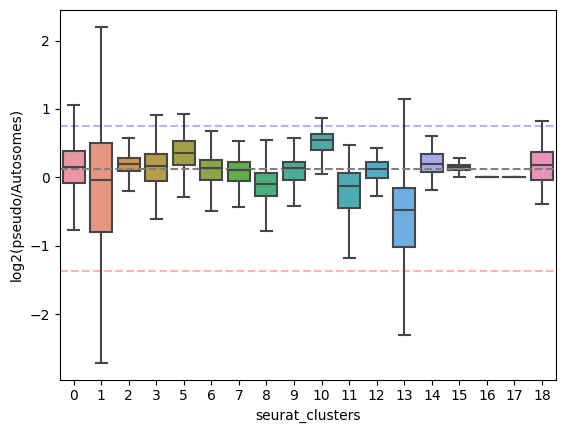

In [22]:
sns.boxplot(x='seurat_clusters', y='pseudo/Auto', data=merged_all_norm_s3,showfliers=False)
plt.hlines(np.median(merged_all_norm_s3['pseudo/Auto']),-0.5,17.5,color="gray",linestyle='dashed')
plt.hlines(np.percentile(merged_all_norm_s3['pseudo/Auto'],5),-0.5,17.5,color="red",linestyle='dashed',alpha=0.3)
plt.hlines(np.percentile(merged_all_norm_s3['pseudo/Auto'],95),-0.5,17.5,color="blue",linestyle='dashed',alpha=0.3)
plt.ylabel('log2(pseudo/Autosomes)',fontsize=10)
#plt.fill_between([-0.5,17.5], np.percentile(merged_all_norm_3['S0/Auto'],5),np.percentile(merged_all_norm_3['S0/Auto'],95), facecolor='lightblue', alpha=0.7)
#plt.savefig('./paper_figures/S1_vs_Auto_mean.png',bbox_inches='tight')
plt.savefig('C:/Users/melkrewi/Desktop/shrimp/snRNAseq/LAB_meeting_19_03_2023/pseudo_vs_Auto_mean_kaz.png',bbox_inches='tight')